# Performing Operations with Python
## On Incarcerated Population Data

[Github repo]:https://github.com/gyphonic/gyphonic.github.io/tree/main
[here]:https://www.kaggle.com/datasets/konradb/prison-population-in-the-us
- Information about the dataset used [here]
- [Github repo]

## Index
- [Dataframe Creation](#dataframe=creation)
- [Plotting Population](#first_plot)
- [Diving Deeper](#diving_deeper)
- [Growth Over Time](#growth)

Todo:
- Regression
- Cross-Analysis  

## Dataframe Creation
<a name="dataframe-creation" />
Here we create a 'DataFrame' object and view the raw data using the 'pandas' package. This data tracks incarcerated populations over time by ethnicity and state.

In [2]:
import pandas as pd

data = pd.DataFrame(pd.read_csv("data/populations_states.csv", parse_dates = ["date"]))
data

,date,data_or_inferred,incarcerated_total,incarcerated_white,incarcerated_black,incarcerated_hispanic,incarcerated_amerind,incarcerated_asian,incarcerated_other,incarcerated_unknown,incarcerated_nonwhite,state,url
0,2000-01-01,raw data,25213.0,8753,16382.0,NaN,NaN,NaN,78.0,NaN,16460.0,Alabama,http://www.doc.state.al.us/StatReports
1,2000-02-01,raw data,25213.0,8753,16382.0,NaN,NaN,NaN,78.0,NaN,16460.0,Alabama,http://www.doc.state.al.us/StatReports
2,2000-03-01,raw data,25161.0,8723,16361.0,NaN,NaN,NaN,77.0,NaN,16438.0,Alabama,http://www.doc.state.al.us/StatReports
3,2000-04-01,raw data,25200.0,8738,16380.0,NaN,NaN,NaN,82.0,NaN,16462.0,Alabama,http://www.doc.state.al.us/StatReports
4,2000-05-01,raw data,25226.0,8788,16358.0,NaN,NaN,NaN,80.0,NaN,16438.0,Alabama,http://www.doc.state.al.us/StatReports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,2022-05-01,raw data,156704.0,90396,60041.0,NaN,3998.0,2269.0,NaN,NaN,66308.0,Federal,https://www.bop.gov/about/statistics/statistic...
9581,2022-06-01,raw data,157426.0,90785,60370.0,NaN,3997.0,2274.0,NaN,NaN,66641.0,Federal,https://www.bop.gov/about/statistics/statistic...
9582,2022-07-01,raw data,157435.0,90792,60386.0,NaN,3995.0,2262.0,NaN,NaN,66643.0,Federal,https://www.bop.gov/about/statistics/statistic...
9583,2022-08-01,raw data,157565.0,90837,60470.0,NaN,4015.0,2243.0,NaN,NaN,66728.0,Federal,https://www.bop.gov/about/statistics/statistic...


## Plotting Population
<a name="first_plot" />
Now that we know what's in the 'DataFrame', let's show a basic line plot of incarcerated population over time. We create an additional column called "year" based on the dates provided in the "date" column for ease of use. 

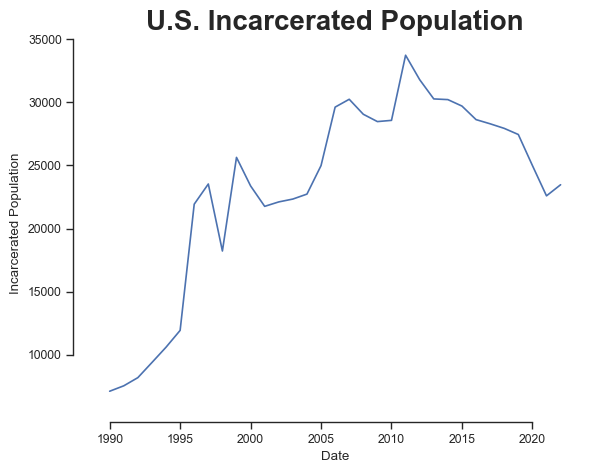

In [3]:
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")
sns.set_context("paper")

data["year"] = data["date"].dt.year

g = sns.lineplot(data = data, x = "year", y = "incarcerated_total", errorbar = None)
g.set_title("U.S. Incarcerated Population", fontdict = {"size": 20, "weight": "bold"})
g.set_ylabel("Incarcerated Population")
g.set_xlabel("Date")
sns.despine(offset = 10, trim = True)


# Diving deeper
<a name="diving_deeper" />
Several large spike are noticable, specifically around the years 1997, 2000, and 2012. We should look individual populations of prisons over time as well as zoom in on some of these dates. Let's define a list of locations we'd like to see and compare them.

In [4]:
data["state"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Federal'], dtype=object)

Here we have a list of all of the unique values in the "state" column. We will select a few values from this field to narrow our research down to a few key states. Adding "Federal" as well might provide additional context.

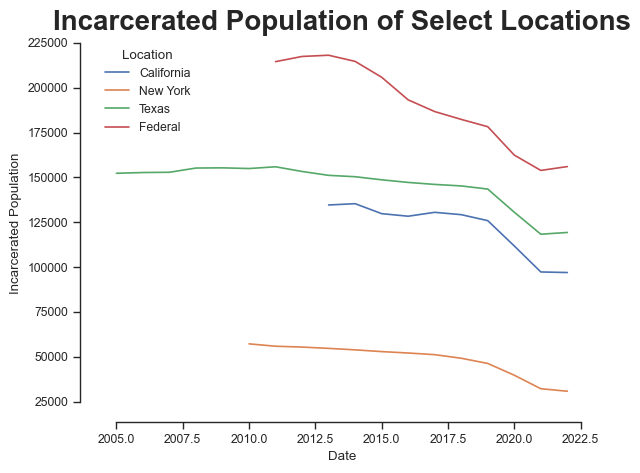

In [5]:
locations = ("California", "Texas", "New York", "Federal")
g = (sns.lineplot(data=data.loc[(data["state"].isin(locations))], x = "year", y = "incarcerated_total", hue = "state", errorbar = None))
g.set_title("Incarcerated Population of Select Locations", fontdict = {"size": 20, "weight": "bold"})
g.set_ylabel("Incarcerated Population")
g.set_xlabel("Date")
g.legend(title = "Location", frameon = False)
sns.despine(offset = 10, trim = True)

An issue arises with the date included in this set. Not all states have reported values stretching back as far as we might want to see. We should try to find some States that report all the way back to 1995.

In [44]:
old_data = data.loc[data["date"] < "1995-01-01"]
states = old_data["state"].unique()
print("State(s) that have data reaching back to 1995:")
for x in states:
    print(x)

State(s) that have data reaching back to 1995:
Wisconsin


Only Wisconson has data represented in this dataset that stretches back to 1995. Let's try 2000 and 2015.

In [45]:
old_data = data.loc[data["date"] < "2000-01-01"]
states = old_data["state"].unique()
print("States that report data back to 2000: " + str(len(old_data["state"].unique())))
for x in states:
    print(x)

States that report data back to 2000: 4
Michigan
Minnesota
North Carolina
Wisconsin


In [6]:
old_data = data.loc[data["date"] < "2015-01-01"]
states = old_data["state"].unique()
print("States that report data back to 2015: " + str(len(old_data["state"].unique())))
for x in states:
    print(x)

States that report data back to 2015: 51
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
Federal


It looks like our data will not be much use in graphing a total population before 2015. This could affect how population can be percieved as "growing" over time We could plot the velocities of some of the states that report older data however.

# Growth Over Time
<a name=growth />
Let's examine Wisconsin's data in more depth.

In [53]:
data.loc[data["state"] == "Wisconsin"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 8942 to 9328
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   387 non-null    datetime64[ns]
 1   data_or_inferred       387 non-null    object        
 2   incarcerated_total     387 non-null    float64       
 3   incarcerated_white     387 non-null    int64         
 4   incarcerated_black     387 non-null    float64       
 5   incarcerated_hispanic  0 non-null      float64       
 6   incarcerated_amerind   387 non-null    float64       
 7   incarcerated_asian     387 non-null    float64       
 8   incarcerated_other     0 non-null      float64       
 9   incarcerated_unknown   387 non-null    float64       
 10  incarcerated_nonwhite  387 non-null    float64       
 11  state                  387 non-null    object        
 12  url                    387 non-null    object        
 13  year  

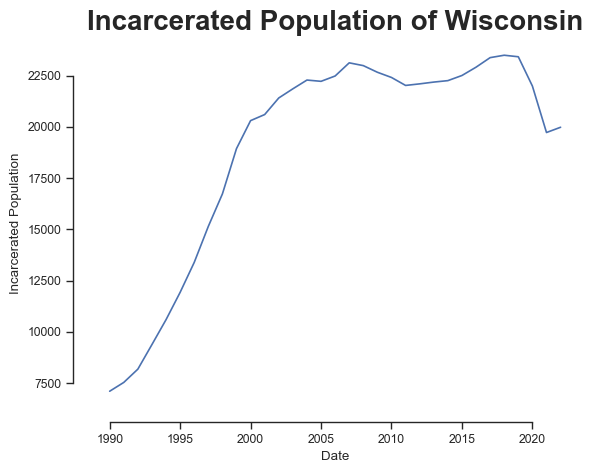

In [54]:
g = sns.lineplot(data = data.loc[data["state"] == "Wisconsin"], x = "year" , y = "incarcerated_total", errorbar = None)
g.set_title("Incarcerated Population of Wisconsin", fontdict = {"size": 20, "weight": "bold"})
g.set_ylabel("Incarcerated Population")
g.set_xlabel("Date")
sns.despine(offset = 10, trim = True)

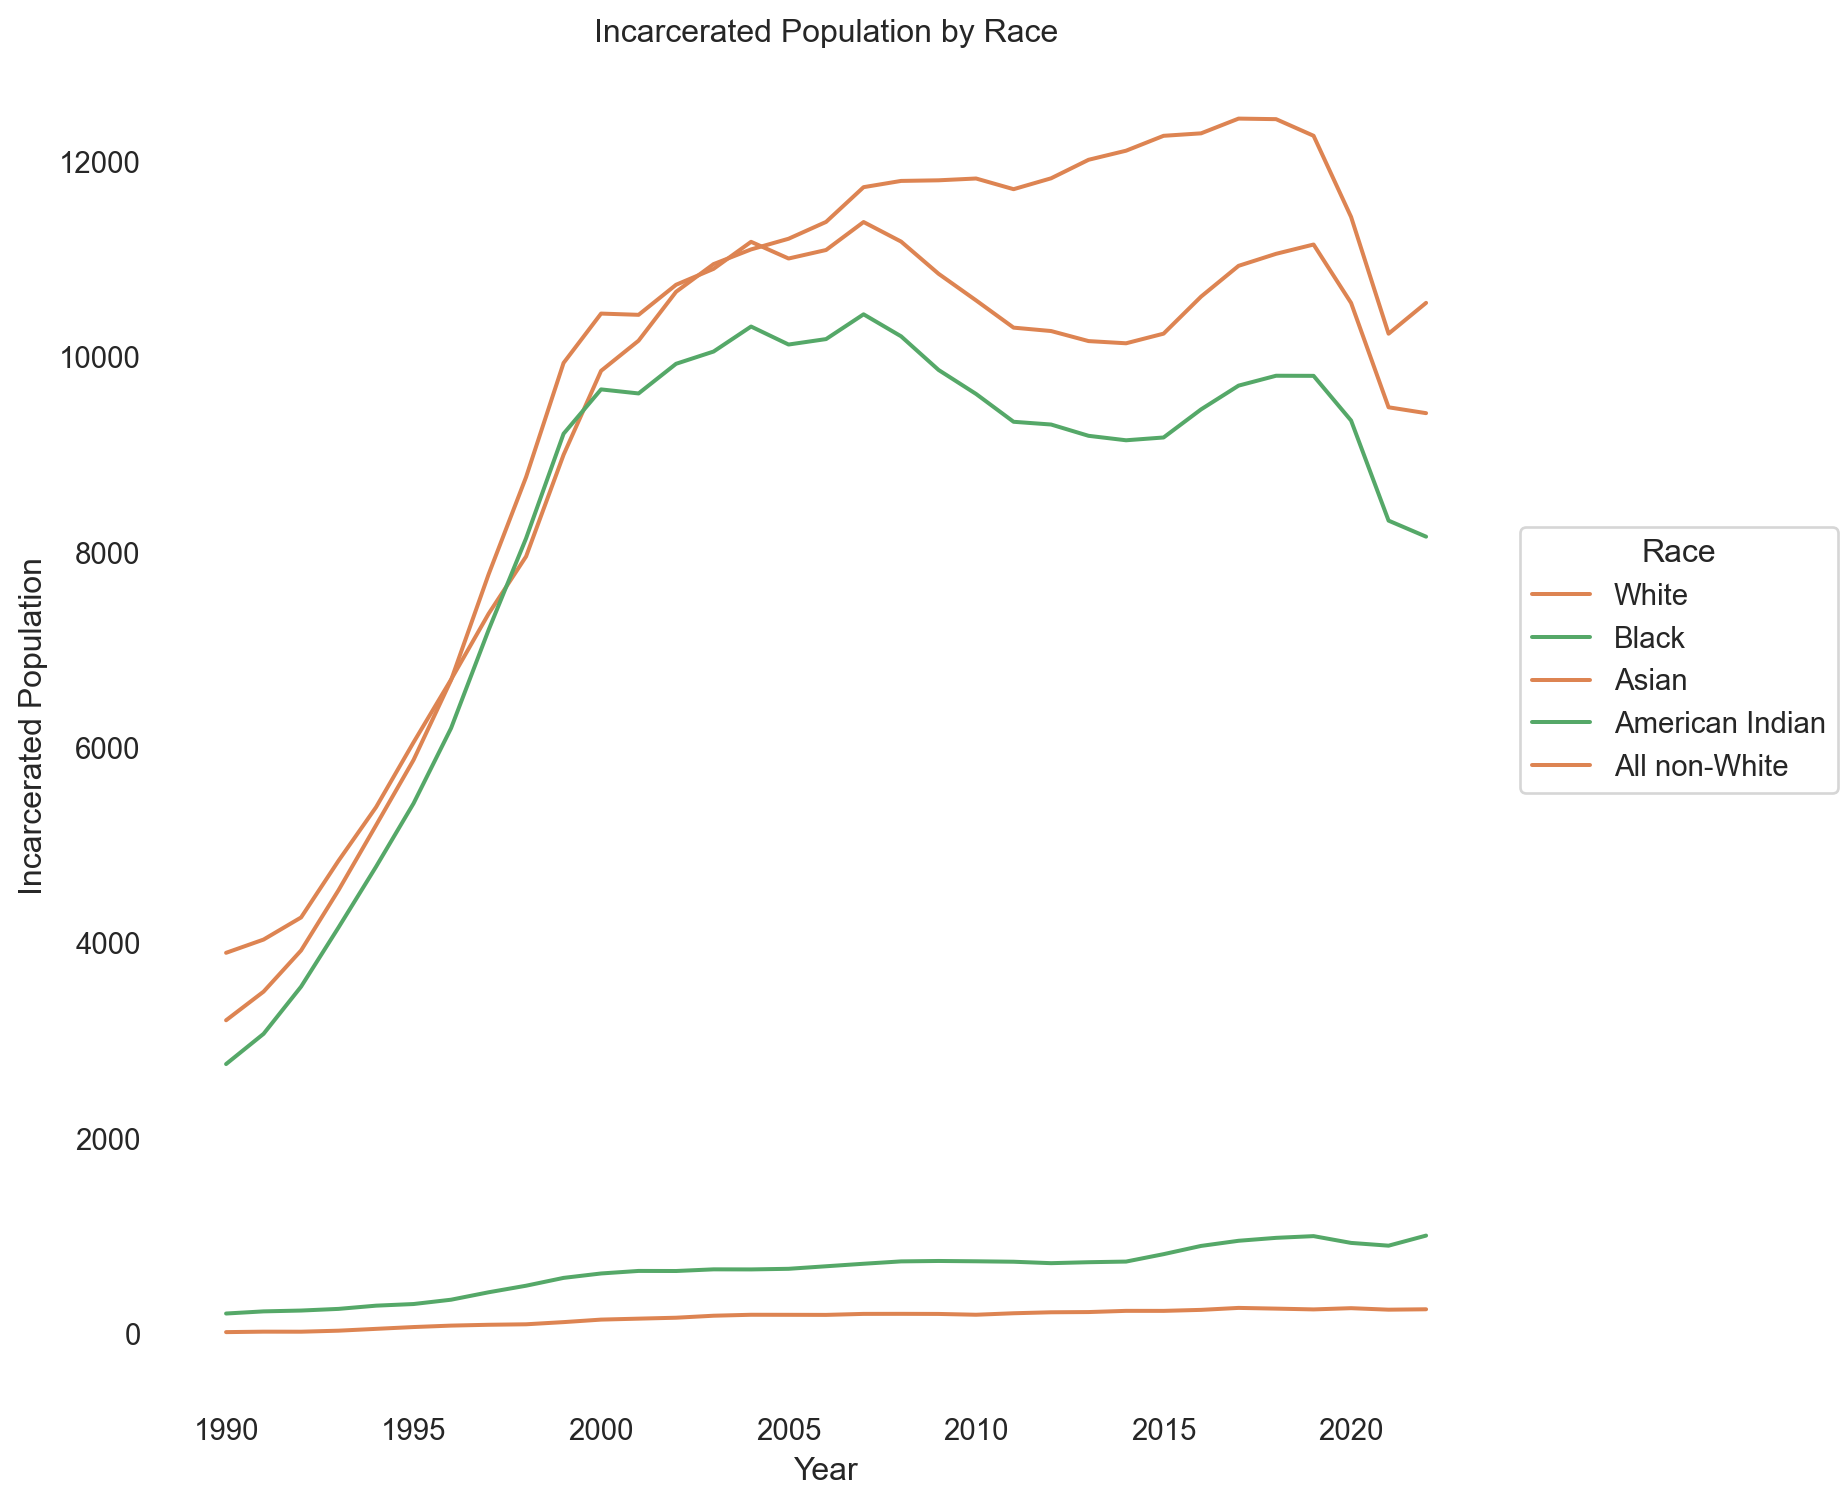

In [7]:
import seaborn.objects as so

(
    so.Plot(data = data.loc[data["state"] == "Wisconsin"], x = "year")
    .add(so.Line(color="C1"), so.Agg(), y="incarcerated_white", label="White")
    .add(so.Line(color="C2"), so.Agg(), y="incarcerated_black", label="Black")
    .add(so.Line(color="C1"), so.Agg(), y="incarcerated_asian", label="Asian")
    .add(so.Line(color="C2"), so.Agg(), y="incarcerated_amerind", label="American Indian")
    .add(so.Line(color="C1"), so.Agg(), y="incarcerated_nonwhite", label="All non-White")
    .label(y = "Incarcerated Population", x = "Year", title = "Incarcerated Population by Race", legend = "Race")
    .layout(size = (8, 8))
    .theme({"axes.facecolor": "w"})
    
)

Let's perform comparative analysis on the traits of offender population over time.

In [22]:
wisconsin_data = data.loc[data["state"] == "Wisconsin"]
wisconsin_data.columns

Index(['date', 'data_or_inferred', 'incarcerated_total', 'incarcerated_white',
       'incarcerated_black', 'incarcerated_hispanic', 'incarcerated_amerind',
       'incarcerated_asian', 'incarcerated_other', 'incarcerated_unknown',
       'incarcerated_nonwhite', 'state', 'url'],
      dtype='object')